In [1]:
import os
from os import listdir
from os import path
from os.path import isfile, join, getsize
import re
import pandas as pd

import json
import io
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#need this for some stupid reason to import essentia
import sys
sys.path.append("/usr/local/lib/python3.8/site-packages")
import essentia
import essentia.standard as es



Bad key "text.kerning_factor" on line 4 in
/opt/tljh/user/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import boto3
import tempfile

In [3]:
#Load some data
s3 = boto3.resource('s3', region_name='us-east-1')
bucket = s3.Bucket('pkls')

#open the essentia file. This downloads the file locally to the instance
#so that it doesnt have to fit directly into memory
fname = 'cover80_song_pair_data.pkl'
if os.path.isfile(fname) == False:
    %sc
    !wget 'https://pkls.s3.amazonaws.com/cover80_song_pair_data.pkl'

In [4]:
#traindf = pd.read_pickle('https://pkls.s3.amazonaws.com/cover80_song_pair_data.pkl') ## Cover_80 Songs
#testdf = pd.read_pickle('https://pkls.s3.amazonaws.com/plagerism_song_pair_data.pkl') ## Susp. Plagiarism 48 pairs

In [5]:
stem_tr_df = pd.read_pickle('https://pkls.s3.amazonaws.com/cover80_song_pair_stem_data.pkl ') ## Cover_80 Songs Stem

In [6]:
stem_ts_df = pd.read_pickle('https://pkls.s3.amazonaws.com/plagerism_song_pair_stem_data.pkl') ## Susp. Plagiarism 48 pairs

In [10]:
### Cover 80 ####

    # stem_tr_df ### 77 rows × 36 columns

### Plagiarism 46 ###

    # stem_ts_df ### 45 x 36 columns

### Dataframe Preview - ### Cover 80 - Stem ####

In [11]:
stem_tr_df = stem_tr_df[stem_tr_df['pair'] != 'All_Along_The_Watchtower']
stem_tr_df = stem_tr_df[stem_tr_df['pair'] != 'Let_It_Be']
stem_tr_df = stem_tr_df[stem_tr_df['pair'] != 'Take_Me_To_The_River']
#stem_tr_df
stem_tr_df.head(1) ## stemming for Cover 80

,pair,song_1,song_2,MFCC_1_bass,MFCC_1_drums,MFCC_1_vocals,MFCC_1_other,GFCC_1_bass,GFCC_1_drums,GFCC_1_vocals,...,HPCP_2_other,sim_matrix_bass,sim_matrix_drums,sim_matrix_vocals,sim_matrix_other,sim_distance_bass,sim_distance_drums,sim_distance_vocals,sim_distance_other,sim_distance_argmin
0,A_Whiter_Shade_Of_Pale,annie_lennox+Medusa+03-A_Whiter_Shade_Of_Pale,procol_harum+Greatest_Hits+2-A_Whiter_Shade_Of...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.044063,0.037751,0.035935,0.022592,0.022592


### Dataframe Preview - ### Plagiarism 46 - Stem ####

In [15]:
stem_ts_df = stem_ts_df.drop([stem_ts_df.index[29]])
stem_ts_df.head(1) ## stemming for Suspected 50
#stem_ts_df

,pair,song_1,song_2,MFCC_1_bass,MFCC_1_drums,MFCC_1_vocals,MFCC_1_other,GFCC_1_bass,GFCC_1_drums,GFCC_1_vocals,...,HPCP_2_other,sim_matrix_bass,sim_matrix_drums,sim_matrix_vocals,sim_matrix_other,sim_distance_bass,sim_distance_drums,sim_distance_vocals,sim_distance_other,sim_distance_argmin
0,1,1.Juice WRLD - Lucid Dreams_Cpy,1.yellowcard-holly-wood-died_Org,"[[1.441698e-11, 2.6813463e-20, 0.0, 0.0, 0.0, ...","[[2.1095098e-05, 1.87994e-12, 0.0, 1.2482786e-...","[[3.5787045e-06, 7.3024994e-14, 1.6972452e-13,...","[[2.3845529e-05, 2.4495484e-12, 2.3903596e-10,...","[[1.1341816e-09, 2.1096323e-18, 0.0, 0.0, 0.0,...","[[0.0016602164, 1.1362626e-10, 0.0, 1.0038605e...","[[0.00028141937, 6.0297847e-12, 1.39602765e-11...",...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.051645,0.037107,0.050598,0.050831,0.037107


### Cover 80 Stem distributions

In [36]:
stem_tr_mfcc1_bass = np.array(stem_tr_df['MFCC_1_bass']) ## Cover_80
stem_tr_mfcc1_drums = np.array(stem_tr_df['MFCC_1_drums']) ## Cover_80
stem_tr_mfcc1_vocals = np.array(stem_tr_df['MFCC_1_vocals']) ## Cover_80
stem_tr_mfcc1_other = np.array(stem_tr_df['MFCC_1_other']) ## Cover_80

stem_tr_gfcc1_bass = np.array(stem_tr_df['GFCC_1_bass']) ## Cover_80
stem_tr_gfcc1_drums = np.array(stem_tr_df['GFCC_1_drums']) ## Cover_80
stem_tr_gfcc1_vocals = np.array(stem_tr_df['GFCC_1_vocals']) ## Cover_80
stem_tr_gfcc1_other = np.array(stem_tr_df['GFCC_1_other']) ## Cover_80

stem_tr_hpcp1_bass = np.array(stem_tr_df['HPCP_1_bass']) ## Cover_80
stem_tr_hpcp1_drums = np.array(stem_tr_df['HPCP_1_drums']) ## Cover_80
stem_tr_hpcp1_vocals = np.array(stem_tr_df['HPCP_1_vocals']) ## Cover_80
stem_tr_hpcp1_other = np.array(stem_tr_df['HPCP_1_other']) ## Cover_80

stem_tr_mfcc2_bass = np.array(stem_tr_df['MFCC_2_bass']) ## Cover_80
stem_tr_mfcc2_drums = np.array(stem_tr_df['MFCC_2_drums']) ## Cover_80
stem_tr_mfcc2_vocals = np.array(stem_tr_df['MFCC_2_vocals']) ## Cover_80
stem_tr_mfcc2_other = np.array(stem_tr_df['MFCC_2_other']) ## Cover_80

stem_tr_gfcc2_bass = np.array(stem_tr_df['GFCC_2_bass']) ## Cover_80
stem_tr_gfcc2_drums = np.array(stem_tr_df['GFCC_2_drums']) ## Cover_80
stem_tr_gfcc2_vocals = np.array(stem_tr_df['GFCC_2_vocals']) ## Cover_80
stem_tr_gfcc2_other = np.array(stem_tr_df['GFCC_2_other']) ## Cover_80

stem_tr_hpcp2_bass = np.array(stem_tr_df['HPCP_2_bass']) ## Cover_80
stem_tr_hpcp2_drums = np.array(stem_tr_df['HPCP_2_drums']) ## Cover_80
stem_tr_hpcp2_vocals = np.array(stem_tr_df['HPCP_2_vocals']) ## Cover_80
stem_tr_hpcp2_other = np.array(stem_tr_df['HPCP_2_other']) ## Cover_80

stem_tr_sim_mat_bass = np.array(stem_tr_df['sim_matrix_bass']) ## Cover_80
stem_tr_sim_mat_drums = np.array(stem_tr_df['sim_matrix_drums']) ## Cover_80
stem_tr_sim_mat_vocals = np.array(stem_tr_df['sim_matrix_vocals']) ## Cover_80
stem_tr_sim_mat_other = np.array(stem_tr_df['sim_matrix_other']) ## Cover_80


stem_tr_sim_dist_bass = np.array(stem_tr_df['sim_distance_bass']) ## Cover_80
stem_tr_sim_dist_drums = np.array(stem_tr_df['sim_distance_drums']) ## Cover_80
stem_tr_sim_dist_vocals = np.array(stem_tr_df['sim_distance_vocals']) ## Cover_80
stem_tr_sim_dist_other = np.array(stem_tr_df['sim_distance_other']) ## Cover_80

stem_tr_sim_dist_argmin = np.array(stem_tr_df['sim_distance_argmin']) ## Cover_80


#len(stem_tr)

### Suspected 50 Stem distributions

In [58]:
stem_ts_mfcc1_bass = np.array(stem_ts_df['MFCC_1_bass']) ## Suspected 50
stem_ts_mfcc1_drums = np.array(stem_ts_df['MFCC_1_drums']) ## Suspected 50
stem_ts_mfcc1_vocals = np.array(stem_ts_df['MFCC_1_vocals']) ## Suspected 50
stem_ts_mfcc1_other = np.array(stem_ts_df['MFCC_1_other']) ## Suspected 50

stem_ts_gfcc1_bass = np.array(stem_ts_df['GFCC_1_bass']) ## Suspected 50
stem_ts_gfcc1_drums = np.array(stem_ts_df['GFCC_1_drums']) ## Suspected 50
stem_ts_gfcc1_vocals = np.array(stem_ts_df['GFCC_1_vocals']) ## Suspected 50
stem_ts_gfcc1_other = np.array(stem_ts_df['GFCC_1_other']) ## Suspected 50

stem_ts_hpcp1_bass = np.array(stem_ts_df['HPCP_1_bass']) ## Suspected 50
stem_ts_hpcp1_drums = np.array(stem_ts_df['HPCP_1_drums']) ## Suspected 50
stem_ts_hpcp1_vocals = np.array(stem_ts_df['HPCP_1_vocals']) ## Suspected 50
stem_ts_hpcp1_other = np.array(stem_ts_df['HPCP_1_other']) ## Suspected 50

stem_ts_mfcc2_bass = np.array(stem_ts_df['MFCC_2_bass']) ## Suspected 50
stem_ts_mfcc2_drums = np.array(stem_ts_df['MFCC_2_drums']) ## Suspected 50
stem_ts_mfcc2_vocals = np.array(stem_ts_df['MFCC_2_vocals']) ## Suspected 50
stem_ts_mfcc2_other = np.array(stem_ts_df['MFCC_2_other']) ## Suspected 50

stem_ts_gfcc2_bass = np.array(stem_ts_df['GFCC_2_bass']) ## Suspected 50
stem_ts_gfcc2_drums = np.array(stem_ts_df['GFCC_2_drums']) ## Suspected 50
stem_ts_gfcc2_vocals = np.array(stem_ts_df['GFCC_2_vocals']) ## Suspected 50
stem_ts_gfcc2_other = np.array(stem_ts_df['GFCC_2_other']) ## Suspected 50

stem_ts_hpcp2_bass = np.array(stem_ts_df['HPCP_2_bass']) ## Suspected 50
stem_ts_hpcp2_drums = np.array(stem_ts_df['HPCP_2_drums']) ## Suspected 50
stem_ts_hpcp2_vocals = np.array(stem_ts_df['HPCP_2_vocals']) ## Suspected 50
stem_ts_hpcp2_other = np.array(stem_ts_df['HPCP_2_other']) ## Suspected 50

stem_ts_sim_mat_bass = np.array(stem_ts_df['sim_matrix_bass']) ## Suspected 50
stem_ts_sim_mat_drums = np.array(stem_ts_df['sim_matrix_drums']) ## Suspected 50
stem_ts_sim_mat_vocals = np.array(stem_ts_df['sim_matrix_vocals']) ## Suspected 50
stem_ts_sim_mat_other = np.array(stem_ts_df['sim_matrix_other']) ## Suspected 50


stem_ts_sim_dist_bass = np.array(stem_ts_df['sim_distance_bass']) ## Suspected 50
stem_ts_sim_dist_drums = np.array(stem_ts_df['sim_distance_drums']) ## Suspected 50
stem_ts_sim_dist_vocals = np.array(stem_ts_df['sim_distance_vocals']) ## Suspected 50
stem_ts_sim_dist_other = np.array(stem_ts_df['sim_distance_other']) ## Suspected 50

stem_ts_sim_dist_argmin = np.array(stem_ts_df['sim_distance_argmin']) ## Suspected 50

## Cover 80 MFCC & GFCC distributions

#### MFCC 1 & 2

In [151]:
def  set_the_mean(feat, val) : 
    A = np.array([])
    for x in range(0, val) : 
        A = np.append(A, np.mean(feat[x]))
    return(A)

In [152]:
MFCC1_bass_tr_1_5 = set_the_mean(stem_tr_mfcc1_bass[0:5],5)  # first 5 song MFCC
MFCC1_bass_tr_1_20 = set_the_mean(stem_tr_mfcc1_bass[0:20],20) # first 20 song MFCC
MFCC1_bass_tr_1_35 = set_the_mean(stem_tr_mfcc1_bass[0:35],35) # first 35 song MFCC
MFCC1_bass_tr_1_50 = set_the_mean(stem_tr_mfcc1_bass[0:50],50) # first 50 song MFCC
MFCC1_bass_tr_1_77 = set_the_mean(stem_tr_mfcc1_bass[0:77],77) # first 77 song MFCC

MFCC1_drums_tr_1_5 = set_the_mean(stem_tr_mfcc1_drums[0:5],5)  # first 5 song MFCC
MFCC1_drums_tr_1_20 = set_the_mean(stem_tr_mfcc1_drums[0:20],20) # first 20 song MFCC
MFCC1_drums_tr_1_35 = set_the_mean(stem_tr_mfcc1_drums[0:35],35) # first 35 song MFCC
MFCC1_drums_tr_1_50 = set_the_mean(stem_tr_mfcc1_drums[0:50],50) # first 50 song MFCC
MFCC1_drums_tr_1_77 = set_the_mean(stem_tr_mfcc1_drums[0:77],77) # first 77 song MFCC

MFCC1_vocals_tr_1_5 = set_the_mean(stem_tr_mfcc1_vocals[0:5],5)  # first 5 song MFCC
MFCC1_vocals_tr_1_20 = set_the_mean(stem_tr_mfcc1_vocals[0:20],20) # first 20 song MFCC
MFCC1_vocals_tr_1_35 = set_the_mean(stem_tr_mfcc1_vocals[0:35],35) # first 35 song MFCC
MFCC1_vocals_tr_1_50 = set_the_mean(stem_tr_mfcc1_vocals[0:50],50) # first 50 song MFCC
MFCC1_vocals_tr_1_77 = set_the_mean(stem_tr_mfcc1_vocals[0:77],77) # first 77 song MFCC

MFCC1_other_tr_1_5 = set_the_mean(stem_tr_mfcc1_other[0:5],5)  # first 5 song MFCC
MFCC1_other_tr_1_20 = set_the_mean(stem_tr_mfcc1_other[0:20],20) # first 20 song MFCC
MFCC1_other_tr_1_35 = set_the_mean(stem_tr_mfcc1_other[0:35],35) # first 35 song MFCC
MFCC1_other_tr_1_50 = set_the_mean(stem_tr_mfcc1_other[0:50],50) # first 50 song MFCC
MFCC1_other_tr_1_77 = set_the_mean(stem_tr_mfcc1_other[0:77],77) # first 77 song MFCC


MFCC2_bass_tr_1_5 = set_the_mean(stem_tr_mfcc2_bass[0:5],5)  # first 5 song MFCC
MFCC2_bass_tr_1_20 = set_the_mean(stem_tr_mfcc2_bass[0:20],20) # first 20 song MFCC
MFCC2_bass_tr_1_35 = set_the_mean(stem_tr_mfcc2_bass[0:35],35) # first 35 song MFCC
MFCC2_bass_tr_1_50 = set_the_mean(stem_tr_mfcc2_bass[0:50],50) # first 50 song MFCC
MFCC2_bass_tr_1_77 = set_the_mean(stem_tr_mfcc2_bass[0:77],77) # first 77 song MFCC

MFCC2_drums_tr_1_5 = set_the_mean(stem_tr_mfcc2_drums[0:5],5)  # first 5 song MFCC
MFCC2_drums_tr_1_20 = set_the_mean(stem_tr_mfcc2_drums[0:20],20) # first 20 song MFCC
MFCC2_drums_tr_1_35 = set_the_mean(stem_tr_mfcc2_drums[0:35],35) # first 35 song MFCC
MFCC2_drums_tr_1_50 = set_the_mean(stem_tr_mfcc2_drums[0:50],50) # first 50 song MFCC
MFCC2_drums_tr_1_77 = set_the_mean(stem_tr_mfcc2_drums[0:77],77) # first 77 song MFCC

MFCC2_vocals_tr_1_5 = set_the_mean(stem_tr_mfcc2_vocals[0:5],5)  # first 5 song MFCC
MFCC2_vocals_tr_1_20 = set_the_mean(stem_tr_mfcc2_vocals[0:20],20) # first 20 song MFCC
MFCC2_vocals_tr_1_35 = set_the_mean(stem_tr_mfcc2_vocals[0:35],35) # first 35 song MFCC
MFCC2_vocals_tr_1_50 = set_the_mean(stem_tr_mfcc2_vocals[0:50],50) # first 50 song MFCC
MFCC2_vocals_tr_1_77 = set_the_mean(stem_tr_mfcc2_vocals[0:77],77) # first 77 song MFCC

MFCC2_other_tr_1_5 = set_the_mean(stem_tr_mfcc2_other[0:5],5)  # first 5 song MFCC
MFCC2_other_tr_1_20 = set_the_mean(stem_tr_mfcc2_other[0:20],20) # first 20 song MFCC
MFCC2_other_tr_1_35 = set_the_mean(stem_tr_mfcc2_other[0:35],35) # first 35 song MFCC
MFCC2_other_tr_1_50 = set_the_mean(stem_tr_mfcc2_other[0:50],50) # first 50 song MFCC
MFCC2_other_tr_1_77 = set_the_mean(stem_tr_mfcc2_other[0:77],77) # first 77 song MFCC

#### GFCC 1 & 2

In [153]:
GFCC1_bass_tr_1_5 = set_the_mean(stem_tr_gfcc1_bass[0:5],5)  # first 5 song GFCC
GFCC1_bass_tr_1_20 = set_the_mean(stem_tr_gfcc1_bass[0:20],20) # first 20 song GFCC
GFCC1_bass_tr_1_35 = set_the_mean(stem_tr_gfcc1_bass[0:35],35) # first 35 song GFCC
GFCC1_bass_tr_1_50 = set_the_mean(stem_tr_gfcc1_bass[0:50],50) # first 50 song GFCC
GFCC1_bass_tr_1_77 = set_the_mean(stem_tr_gfcc1_bass[0:77],77) # first 77 song GFCC

GFCC1_drums_tr_1_5 = set_the_mean(stem_tr_gfcc1_drums[0:5],5)  # first 5 song GFCC
GFCC1_drums_tr_1_20 = set_the_mean(stem_tr_gfcc1_drums[0:20],20) # first 20 song GFCC
GFCC1_drums_tr_1_35 = set_the_mean(stem_tr_gfcc1_drums[0:35],35) # first 35 song GFCC
GFCC1_drums_tr_1_50 = set_the_mean(stem_tr_gfcc1_drums[0:50],50) # first 50 song GFCC
GFCC1_drums_tr_1_77 = set_the_mean(stem_tr_gfcc1_drums[0:77],77) # first 77 song GFCC

GFCC1_vocals_tr_1_5 = set_the_mean(stem_tr_gfcc1_vocals[0:5],5)  # first 5 song GFCC
GFCC1_vocals_tr_1_20 = set_the_mean(stem_tr_gfcc1_vocals[0:20],20) # first 20 song GFCC
GFCC1_vocals_tr_1_35 = set_the_mean(stem_tr_gfcc1_vocals[0:35],35) # first 35 song GFCC
GFCC1_vocals_tr_1_50 = set_the_mean(stem_tr_gfcc1_vocals[0:50],50) # first 50 song GFCC
GFCC1_vocals_tr_1_77 = set_the_mean(stem_tr_gfcc1_vocals[0:77],77) # first 77 song GFCC

GFCC1_other_tr_1_5 = set_the_mean(stem_tr_gfcc1_other[0:5],5)  # first 5 song GFCC
GFCC1_other_tr_1_20 = set_the_mean(stem_tr_gfcc1_other[0:20],20) # first 20 song GFCC
GFCC1_other_tr_1_35 = set_the_mean(stem_tr_gfcc1_other[0:35],35) # first 35 song GFCC
GFCC1_other_tr_1_50 = set_the_mean(stem_tr_gfcc1_other[0:50],50) # first 50 song GFCC
GFCC1_other_tr_1_77 = set_the_mean(stem_tr_gfcc1_other[0:77],77) # first 77 song GFCC


GFCC2_bass_tr_1_5 = set_the_mean(stem_tr_gfcc2_bass[0:5],5)  # first 5 song GFCC
GFCC2_bass_tr_1_20 = set_the_mean(stem_tr_gfcc2_bass[0:20],20) # first 20 song GFCC
GFCC2_bass_tr_1_35 = set_the_mean(stem_tr_gfcc2_bass[0:35],35) # first 35 song GFCC
GFCC2_bass_tr_1_50 = set_the_mean(stem_tr_gfcc2_bass[0:50],50) # first 50 song GFCC
GFCC2_bass_tr_1_77 = set_the_mean(stem_tr_gfcc2_bass[0:77],77) # first 77 song GFCC

GFCC2_drums_tr_1_5 = set_the_mean(stem_tr_gfcc2_drums[0:5],5)  # first 5 song GFCC
GFCC2_drums_tr_1_20 = set_the_mean(stem_tr_gfcc2_drums[0:20],20) # first 20 song GFCC
GFCC2_drums_tr_1_35 = set_the_mean(stem_tr_gfcc2_drums[0:35],35) # first 35 song GFCC
GFCC2_drums_tr_1_50 = set_the_mean(stem_tr_gfcc2_drums[0:50],50) # first 50 song GFCC
GFCC2_drums_tr_1_77 = set_the_mean(stem_tr_gfcc2_drums[0:77],77) # first 77 song GFCC

GFCC2_vocals_tr_1_5 = set_the_mean(stem_tr_gfcc2_vocals[0:5],5)  # first 5 song GFCC
GFCC2_vocals_tr_1_20 = set_the_mean(stem_tr_gfcc2_vocals[0:20],20) # first 20 song GFCC
GFCC2_vocals_tr_1_35 = set_the_mean(stem_tr_gfcc2_vocals[0:35],35) # first 35 song GFCC
GFCC2_vocals_tr_1_50 = set_the_mean(stem_tr_gfcc2_vocals[0:50],50) # first 50 song GFCC
GFCC2_vocals_tr_1_77 = set_the_mean(stem_tr_gfcc2_vocals[0:77],77) # first 77 song GFCC

GFCC2_other_tr_1_5 = set_the_mean(stem_tr_gfcc2_other[0:5],5)  # first 5 song GFCC
GFCC2_other_tr_1_20 = set_the_mean(stem_tr_gfcc2_other[0:20],20) # first 20 song GFCC
GFCC2_other_tr_1_35 = set_the_mean(stem_tr_gfcc2_other[0:35],35) # first 35 song GFCC
GFCC2_other_tr_1_50 = set_the_mean(stem_tr_gfcc2_other[0:50],50) # first 50 song GFCC
GFCC2_other_tr_1_77 = set_the_mean(stem_tr_gfcc2_other[0:77],77) # first 77 song GFCC


#### HPCP 1 & 2

In [154]:
HPCP1_bass_tr_1_5 = set_the_mean(stem_tr_hpcp1_bass[0:5],5)  # first 5 song HPCP
HPCP1_bass_tr_1_20 = set_the_mean(stem_tr_hpcp1_bass[0:20],20) # first 20 song HPCP
HPCP1_bass_tr_1_35 = set_the_mean(stem_tr_hpcp1_bass[0:35],35) # first 35 song HPCP
HPCP1_bass_tr_1_50 = set_the_mean(stem_tr_hpcp1_bass[0:50],50) # first 50 song HPCP
HPCP1_bass_tr_1_77 = set_the_mean(stem_tr_hpcp1_bass[0:77],77) # first 77 song HPCP

HPCP1_drums_tr_1_5 = set_the_mean(stem_tr_hpcp1_drums[0:5],5)  # first 5 song HPCP
HPCP1_drums_tr_1_20 = set_the_mean(stem_tr_hpcp1_drums[0:20],20) # first 20 song HPCP
HPCP1_drums_tr_1_35 = set_the_mean(stem_tr_hpcp1_drums[0:35],35) # first 35 song HPCP
HPCP1_drums_tr_1_50 = set_the_mean(stem_tr_hpcp1_drums[0:50],50) # first 50 song HPCP
HPCP1_drums_tr_1_77 = set_the_mean(stem_tr_hpcp1_drums[0:77],77) # first 77 song HPCP

HPCP1_vocals_tr_1_5 = set_the_mean(stem_tr_hpcp1_vocals[0:5],5)  # first 5 song HPCP
HPCP1_vocals_tr_1_20 = set_the_mean(stem_tr_hpcp1_vocals[0:20],20) # first 20 song HPCP
HPCP1_vocals_tr_1_35 = set_the_mean(stem_tr_hpcp1_vocals[0:35],35) # first 35 song HPCP
HPCP1_vocals_tr_1_50 = set_the_mean(stem_tr_hpcp1_vocals[0:50],50) # first 50 song HPCP
HPCP1_vocals_tr_1_77 = set_the_mean(stem_tr_hpcp1_vocals[0:77],77) # first 77 song HPCP

HPCP1_other_tr_1_5 = set_the_mean(stem_tr_hpcp1_other[0:5],5)  # first 5 song HPCP
HPCP1_other_tr_1_20 = set_the_mean(stem_tr_hpcp1_other[0:20],20) # first 20 song HPCP
HPCP1_other_tr_1_35 = set_the_mean(stem_tr_hpcp1_other[0:35],35) # first 35 song HPCP
HPCP1_other_tr_1_50 = set_the_mean(stem_tr_hpcp1_other[0:50],50) # first 50 song HPCP
HPCP1_other_tr_1_77 = set_the_mean(stem_tr_hpcp1_other[0:77],77) # first 77 song HPCP

HPCP2_bass_tr_1_5 = set_the_mean(stem_tr_hpcp2_bass[0:5],5)  # first 5 song HPCP
HPCP2_bass_tr_1_20 = set_the_mean(stem_tr_hpcp2_bass[0:20],20) # first 20 song HPCP
HPCP2_bass_tr_1_35 = set_the_mean(stem_tr_hpcp2_bass[0:35],35) # first 35 song HPCP
HPCP2_bass_tr_1_50 = set_the_mean(stem_tr_hpcp2_bass[0:50],50) # first 50 song HPCP
HPCP2_bass_tr_1_77 = set_the_mean(stem_tr_hpcp2_bass[0:77],77) # first 77 song HPCP

HPCP2_drums_tr_1_5 = set_the_mean(stem_tr_hpcp2_drums[0:5],5)  # first 5 song HPCP
HPCP2_drums_tr_1_20 = set_the_mean(stem_tr_hpcp2_drums[0:20],20) # first 20 song HPCP
HPCP2_drums_tr_1_35 = set_the_mean(stem_tr_hpcp2_drums[0:35],35) # first 35 song HPCP
HPCP2_drums_tr_1_50 = set_the_mean(stem_tr_hpcp2_drums[0:50],50) # first 50 song HPCP
HPCP2_drums_tr_1_77 = set_the_mean(stem_tr_hpcp2_drums[0:77],77) # first 77 song HPCP

HPCP2_vocals_tr_1_5 = set_the_mean(stem_tr_hpcp2_vocals[0:5],5)  # first 5 song HPCP
HPCP2_vocals_tr_1_20 = set_the_mean(stem_tr_hpcp2_vocals[0:20],20) # first 20 song HPCP
HPCP2_vocals_tr_1_35 = set_the_mean(stem_tr_hpcp2_vocals[0:35],35) # first 35 song HPCP
HPCP2_vocals_tr_1_50 = set_the_mean(stem_tr_hpcp2_vocals[0:50],50) # first 50 song HPCP
HPCP2_vocals_tr_1_77 = set_the_mean(stem_tr_hpcp2_vocals[0:77],77) # first 77 song HPCP

HPCP2_other_tr_1_5 = set_the_mean(stem_tr_hpcp2_other[0:5],5)  # first 5 song HPCP
HPCP2_other_tr_1_20 = set_the_mean(stem_tr_hpcp2_other[0:20],20) # first 20 song HPCP
HPCP2_other_tr_1_35 = set_the_mean(stem_tr_hpcp2_other[0:35],35) # first 35 song HPCP
HPCP2_other_tr_1_50 = set_the_mean(stem_tr_hpcp2_other[0:50],50) # first 50 song HPCP
HPCP2_other_tr_1_77 = set_the_mean(stem_tr_hpcp2_other[0:77],77) # first 77 song HPCP

#### sim_mat 1 

In [167]:
sim_mat_bass_tr_1_5 = set_the_mean(stem_tr_sim_mat_bass[0:5],5) # first 5 song sim_matrix
sim_mat_bass_tr_1_20 = set_the_mean(stem_tr_sim_mat_bass[0:20],20) # first 20 song sim_matrix
sim_mat_bass_tr_1_35 = set_the_mean(stem_tr_sim_mat_bass[0:35],35) # first 35 song sim_matrix
sim_mat_bass_tr_1_50 = set_the_mean(stem_tr_sim_mat_bass[0:55],55) # first 50 song sim_matrix
sim_mat_bass_tr_1_77 = set_the_mean(stem_tr_sim_mat_bass[0:77],77) # first 77 song sim_matrix

sim_mat_drums_tr_1_5 = set_the_mean(stem_tr_sim_mat_drums[0:5],5) # first 5 song sim_matrix
sim_mat_drums_tr_1_20 = set_the_mean(stem_tr_sim_mat_drums[0:20],20) # first 20 song sim_matrix
sim_mat_drums_tr_1_35 = set_the_mean(stem_tr_sim_mat_drums[0:35],35) # first 35 song sim_matrix
sim_mat_drums_tr_1_50 = set_the_mean(stem_tr_sim_mat_drums[0:55],55) # first 50 song sim_matrix
sim_mat_drums_tr_1_77 = set_the_mean(stem_tr_sim_mat_drums[0:77],77) # first 77 song sim_matrix

sim_mat_vocals_tr_1_5 = set_the_mean(stem_tr_sim_mat_vocals[0:5],5) # first 5 song sim_matrix
sim_mat_vocals_tr_1_20 = set_the_mean(stem_tr_sim_mat_vocals[0:20],20) # first 20 song sim_matrix
sim_mat_vocals_tr_1_35 = set_the_mean(stem_tr_sim_mat_vocals[0:35],35) # first 35 song sim_matrix
sim_mat_vocals_tr_1_50 = set_the_mean(stem_tr_sim_mat_vocals[0:55],55) # first 50 song sim_matrix
sim_mat_vocals_tr_1_77 = set_the_mean(stem_tr_sim_mat_vocals[0:77],77) # first 77 song sim_matrix

sim_mat_other_tr_1_5 = set_the_mean(stem_tr_sim_mat_other[0:5],5) # first 5 song sim_matrix
sim_mat_other_tr_1_20 = set_the_mean(stem_tr_sim_mat_other[0:20],20) # first 20 song sim_matrix
sim_mat_other_tr_1_35 = set_the_mean(stem_tr_sim_mat_other[0:35],35) # first 35 song sim_matrix
sim_mat_other_tr_1_50 = set_the_mean(stem_tr_sim_mat_other[0:55],55) # first 50 song sim_matrix
sim_mat_other_tr_1_77 = set_the_mean(stem_tr_sim_mat_other[0:77],77) # first 77 song sim_matrix

#### sim_dist 1

In [166]:
sim_dist_bass_tr_1_5 = np.array(stem_tr_sim_dist_bass[0:5]) # first 5 song sim_dist
sim_dist_bass_tr_1_20 = np.array(stem_tr_sim_dist_bass[0:20]) # first 20 song sim_dist
sim_dist_bass_tr_1_35 = np.array(stem_tr_sim_dist_bass[0:35]) # first 35 song sim_dist
sim_dist_bass_tr_1_50 = np.array(stem_tr_sim_dist_bass[0:50]) # first 50 song sim_dist
sim_dist_bass_tr_1_77 = np.array(stem_tr_sim_dist_bass[0:77]) # first 77 song sim_dist

sim_dist_drums_tr_1_5 = np.array(stem_tr_sim_dist_drums[0:5]) # first 5 song sim_dist
sim_dist_drums_tr_1_20 = np.array(stem_tr_sim_dist_drums[0:20]) # first 20 song sim_dist
sim_dist_drums_tr_1_35 = np.array(stem_tr_sim_dist_drums[0:35]) # first 35 song sim_dist
sim_dist_drums_tr_1_50 = np.array(stem_tr_sim_dist_drums[0:50]) # first 50 song sim_dist
sim_dist_drums_tr_1_77 = np.array(stem_tr_sim_dist_drums[0:77]) # first 77 song sim_dist

sim_dist_vocals_tr_1_5 = np.array(stem_tr_sim_dist_vocals[0:5]) # first 5 song sim_dist
sim_dist_vocals_tr_1_20 = np.array(stem_tr_sim_dist_vocals[0:20]) # first 20 song sim_dist
sim_dist_vocals_tr_1_35 = np.array(stem_tr_sim_dist_vocals[0:35]) # first 35 song sim_dist
sim_dist_vocals_tr_1_50 = np.array(stem_tr_sim_dist_vocals[0:50]) # first 50 song sim_dist
sim_dist_vocals_tr_1_77 = np.array(stem_tr_sim_dist_vocals[0:77]) # first 77 song sim_dist

sim_dist_other_tr_1_5 = np.array(stem_tr_sim_dist_other[0:5]) # first 5 song sim_dist
sim_dist_other_tr_1_20 = np.array(stem_tr_sim_dist_other[0:20]) # first 20 song sim_dist
sim_dist_other_tr_1_35 = np.array(stem_tr_sim_dist_other[0:35]) # first 35 song sim_dist
sim_dist_other_tr_1_50 = np.array(stem_tr_sim_dist_other[0:50]) # first 50 song sim_dist
sim_dist_other_tr_1_77 = np.array(stem_tr_sim_dist_other[0:77]) # first 77 song sim_dist

#### sim_argmin

In [169]:
sim_dist_argmin_tr_1_5 = np.array(stem_tr_sim_dist_argmin[0:5]) # first 5 song sim_dist
sim_dist_argmin_tr_1_20 = np.array(stem_tr_sim_dist_argmin[0:20]) # first 20 song sim_dist
sim_dist_argmin_tr_1_35 = np.array(stem_tr_sim_dist_argmin[0:35]) # first 35 song sim_dist
sim_dist_argmin_tr_1_50 = np.array(stem_tr_sim_dist_argmin[0:50]) # first 50 song sim_dist
sim_dist_argmin_tr_1_77 = np.array(stem_tr_sim_dist_argmin[0:77]) # first 77 song sim_dist

## Plegiarism 45 MFCC & GFCC distributions

In [170]:
MFCC1_bass_ts_1_5 = set_the_mean(stem_ts_mfcc1_bass[0:5],5)  # first 5 song MFCC
MFCC1_bass_ts_1_20 = set_the_mean(stem_ts_mfcc1_bass[0:20],20) # first 20 song MFCC
MFCC1_bass_ts_1_35 = set_the_mean(stem_ts_mfcc1_bass[0:35],35) # first 35 song MFCC
MFCC1_bass_ts_1_45 = set_the_mean(stem_ts_mfcc1_bass[0:45],45) # first 45 song MFCC

MFCC1_drums_tr_1_5 = set_the_mean(stem_ts_mfcc1_drums[0:5],5)  # first 5 song MFCC
MFCC1_drums_tr_1_20 = set_the_mean(stem_ts_mfcc1_drums[0:20],20) # first 20 song MFCC
MFCC1_drums_tr_1_35 = set_the_mean(stem_ts_mfcc1_drums[0:35],35) # first 35 song MFCC
MFCC1_drums_tr_1_45 = set_the_mean(stem_ts_mfcc1_drums[0:45],45) # first 45 song MFCC

MFCC1_vocals_ts_1_5 = set_the_mean(stem_ts_mfcc1_vocals[0:5],5)  # first 5 song MFCC
MFCC1_vocals_ts_1_20 = set_the_mean(stem_ts_mfcc1_vocals[0:20],20) # first 20 song MFCC
MFCC1_vocals_ts_1_35 = set_the_mean(stem_ts_mfcc1_vocals[0:35],35) # first 35 song MFCC
MFCC1_vocals_ts_1_45 = set_the_mean(stem_ts_mfcc1_vocals[0:45],45) # first 45 song MFCC

MFCC1_other_ts_1_5 = set_the_mean(stem_ts_mfcc1_other[0:5],5)  # first 5 song MFCC
MFCC1_other_ts_1_20 = set_the_mean(stem_ts_mfcc1_other[0:20],20) # first 20 song MFCC
MFCC1_other_ts_1_35 = set_the_mean(stem_ts_mfcc1_other[0:35],35) # first 35 song MFCC
MFCC1_other_ts_1_45 = set_the_mean(stem_ts_mfcc1_other[0:45],45) # first 45 song MFCC



MFCC2_bass_ts_1_5 = set_the_mean(stem_ts_mfcc2_bass[0:5],5)  # first 5 song MFCC
MFCC2_bass_ts_1_20 = set_the_mean(stem_ts_mfcc2_bass[0:20],20) # first 20 song MFCC
MFCC2_bass_ts_1_35 = set_the_mean(stem_ts_mfcc2_bass[0:35],35) # first 35 song MFCC
MFCC2_bass_ts_1_45 = set_the_mean(stem_ts_mfcc2_bass[0:45],45) # first 45 song MFCC

MFCC2_drums_tr_1_5 = set_the_mean(stem_ts_mfcc2_drums[0:5],5)  # first 5 song MFCC
MFCC2_drums_tr_1_20 = set_the_mean(stem_ts_mfcc2_drums[0:20],20) # first 20 song MFCC
MFCC2_drums_tr_1_35 = set_the_mean(stem_ts_mfcc2_drums[0:35],35) # first 35 song MFCC
MFCC2_drums_tr_1_45 = set_the_mean(stem_ts_mfcc2_drums[0:45],45) # first 45 song MFCC

MFCC2_vocals_ts_1_5 = set_the_mean(stem_ts_mfcc2_vocals[0:5],5)  # first 5 song MFCC
MFCC2_vocals_ts_1_20 = set_the_mean(stem_ts_mfcc2_vocals[0:20],20) # first 20 song MFCC
MFCC2_vocals_ts_1_35 = set_the_mean(stem_ts_mfcc2_vocals[0:35],35) # first 35 song MFCC
MFCC2_vocals_ts_1_45 = set_the_mean(stem_ts_mfcc2_vocals[0:45],45) # first 45 song MFCC

MFCC2_other_ts_1_5 = set_the_mean(stem_ts_mfcc2_other[0:5],5)  # first 5 song MFCC
MFCC2_other_ts_1_20 = set_the_mean(stem_ts_mfcc2_other[0:20],20) # first 20 song MFCC
MFCC2_other_ts_1_35 = set_the_mean(stem_ts_mfcc2_other[0:35],35) # first 35 song MFCC
MFCC2_other_ts_1_45 = set_the_mean(stem_ts_mfcc2_other[0:45],45) # first 45 song MFCC

In [171]:
GFCC1_bass_ts_1_5 = set_the_mean(stem_ts_gfcc1_bass[0:5],5)  # first 5 song GFCC
GFCC1_bass_ts_1_20 = set_the_mean(stem_ts_gfcc1_bass[0:20],20) # first 20 song GFCC
GFCC1_bass_ts_1_35 = set_the_mean(stem_ts_gfcc1_bass[0:35],35) # first 35 song GFCC
GFCC1_bass_ts_1_45 = set_the_mean(stem_ts_gfcc1_bass[0:45],45) # first 45 song GFCC

GFCC1_drums_tr_1_5 = set_the_mean(stem_ts_gfcc1_drums[0:5],5)  # first 5 song GFCC
GFCC1_drums_tr_1_20 = set_the_mean(stem_ts_gfcc1_drums[0:20],20) # first 20 song GFCC
GFCC1_drums_tr_1_35 = set_the_mean(stem_ts_gfcc1_drums[0:35],35) # first 35 song GFCC
GFCC1_drums_tr_1_45 = set_the_mean(stem_ts_gfcc1_drums[0:45],45) # first 45 song GFCC

GFCC1_vocals_ts_1_5 = set_the_mean(stem_ts_gfcc1_vocals[0:5],5)  # first 5 song GFCC
GFCC1_vocals_ts_1_20 = set_the_mean(stem_ts_gfcc1_vocals[0:20],20) # first 20 song GFCC
GFCC1_vocals_ts_1_35 = set_the_mean(stem_ts_gfcc1_vocals[0:35],35) # first 35 song GFCC
GFCC1_vocals_ts_1_45 = set_the_mean(stem_ts_gfcc1_vocals[0:45],45) # first 45 song GFCC

GFCC1_other_ts_1_5 = set_the_mean(stem_ts_gfcc1_other[0:5],5)  # first 5 song GFCC
GFCC1_other_ts_1_20 = set_the_mean(stem_ts_gfcc1_other[0:20],20) # first 20 song GFCC
GFCC1_other_ts_1_35 = set_the_mean(stem_ts_gfcc1_other[0:35],35) # first 35 song GFCC
GFCC1_other_ts_1_45 = set_the_mean(stem_ts_gfcc1_other[0:45],45) # first 45 song GFCC


GFCC2_bass_ts_1_5 = set_the_mean(stem_ts_gfcc2_bass[0:5],5)  # first 5 song GFCC
GFCC2_bass_ts_1_20 = set_the_mean(stem_ts_gfcc2_bass[0:20],20) # first 20 song GFCC
GFCC2_bass_ts_1_35 = set_the_mean(stem_ts_gfcc2_bass[0:35],35) # first 35 song GFCC
GFCC2_bass_ts_1_45 = set_the_mean(stem_ts_gfcc2_bass[0:45],45) # first 45 song GFCC

GFCC2_drums_tr_1_5 = set_the_mean(stem_ts_gfcc2_drums[0:5],5)  # first 5 song GFCC
GFCC2_drums_tr_1_20 = set_the_mean(stem_ts_gfcc2_drums[0:20],20) # first 20 song GFCC
GFCC2_drums_tr_1_35 = set_the_mean(stem_ts_gfcc2_drums[0:35],35) # first 35 song GFCC
GFCC2_drums_tr_1_45 = set_the_mean(stem_ts_gfcc2_drums[0:45],45) # first 45 song GFCC

GFCC2_vocals_ts_1_5 = set_the_mean(stem_ts_gfcc2_vocals[0:5],5)  # first 5 song GFCC
GFCC2_vocals_ts_1_20 = set_the_mean(stem_ts_gfcc2_vocals[0:20],20) # first 20 song GFCC
GFCC2_vocals_ts_1_35 = set_the_mean(stem_ts_gfcc2_vocals[0:35],35) # first 35 song GFCC
GFCC2_vocals_ts_1_45 = set_the_mean(stem_ts_gfcc2_vocals[0:45],45) # first 45 song GFCC

GFCC2_other_ts_1_5 = set_the_mean(stem_ts_gfcc2_other[0:5],5)  # first 5 song GFCC
GFCC2_other_ts_1_20 = set_the_mean(stem_ts_gfcc2_other[0:20],20) # first 20 song GFCC
GFCC2_other_ts_1_35 = set_the_mean(stem_ts_gfcc2_other[0:35],35) # first 35 song GFCC
GFCC2_other_ts_1_45 = set_the_mean(stem_ts_gfcc2_other[0:45],45) # first 45 song GFCC

In [ ]:
GFCC2_bass_ts_1_5 = set_the_mean(stem_ts_gfcc2_bass[0:5],5)  # first 5 song GFCC
GFCC2_bass_ts_1_20 = set_the_mean(stem_ts_gfcc2_bass[0:20],20) # first 20 song GFCC
GFCC2_bass_ts_1_35 = set_the_mean(stem_ts_gfcc2_bass[0:35],35) # first 35 song GFCC
GFCC2_bass_ts_1_45 = set_the_mean(stem_ts_gfcc2_bass[0:45],45) # first 45 song GFCC

In [55]:
HPCP1_bass_ts_1_5 = np.array(stem_ts_hpcp1_bass[0:5]) # first 5 song HPCP
HPCP1_bass_ts_1_20 = np.array(stem_ts_hpcp1_bass[0:20]) # first 20 song HPCP
HPCP1_bass_ts_1_35 = np.array(stem_ts_hpcp1_bass[0:35]) # first 35 song HPCP
HPCP1_bass_ts_1_45 = np.array(stem_ts_hpcp1_bass[0:45]) # first 45 song HPCP

HPCP1_drums_ts_1_5 = np.array(stem_ts_hpcp1_drums[0:5]) # first 5 song HPCP
HPCP1_drums_ts_1_20 = np.array(stem_ts_hpcp1_drums[0:20]) # first 20 song HPCP
HPCP1_drums_ts_1_35 = np.array(stem_ts_hpcp1_drums[0:35]) # first 35 song HPCP
HPCP1_drums_ts_1_45 = np.array(stem_ts_hpcp1_drums[0:45]) # first 45 song HPCP

HPCP1_vocals_ts_1_5 = np.array(stem_ts_hpcp1_vocals[0:5]) # first 5 song HPCP
HPCP1_vocals_ts_1_20 = np.array(stem_ts_hpcp1_vocals[0:20]) # first 5 song HPCP
HPCP1_vocals_ts_1_35 = np.array(stem_ts_hpcp1_vocals[0:35]) # first 5 song HPCP
HPCP1_vocals_ts_1_45 = np.array(stem_ts_hpcp1_vocals[0:45]) # first 5 song HPCP

HPCP1_other_ts_1_5 = np.array(stem_ts_hpcp1_other[0:5]) # first 5 song HPCP
HPCP1_other_ts_1_20 = np.array(stem_ts_hpcp1_other[0:20]) # first 20 song HPCP
HPCP1_other_ts_1_35 = np.array(stem_ts_hpcp1_other[0:35]) # first 35 song HPCP
HPCP1_other_ts_1_45 = np.array(stem_ts_hpcp1_other[0:45]) # first 45 song HPCP


HPCP2_bass_ts_1_5 = np.array(stem_ts_hpcp2_bass[0:5]) # first 5 song HPCP
HPCP2_bass_ts_1_20 = np.array(stem_ts_hpcp2_bass[0:20]) # first 20 song HPCP
HPCP2_bass_ts_1_35 = np.array(stem_ts_hpcp2_bass[0:35]) # first 35 song HPCP
HPCP2_bass_ts_1_45 = np.array(stem_ts_hpcp2_bass[0:45]) # first 45 song HPCP

HPCP2_drums_ts_1_5 = np.array(stem_ts_hpcp2_drums[0:5]) # first 5 song HPCP
HPCP2_drums_ts_1_20 = np.array(stem_ts_hpcp2_drums[0:20]) # first 20 song HPCP
HPCP2_drums_ts_1_35 = np.array(stem_ts_hpcp2_drums[0:35]) # first 35 song HPCP
HPCP2_drums_ts_1_45 = np.array(stem_ts_hpcp2_drums[0:45]) # first 45 song HPCP

HPCP2_vocals_ts_1_5 = np.array(stem_ts_hpcp2_vocals[0:5]) # first 5 song HPCP
HPCP2_vocals_ts_1_20 = np.array(stem_ts_hpcp2_vocals[0:20]) # first 5 song HPCP
HPCP2_vocals_ts_1_35 = np.array(stem_ts_hpcp2_vocals[0:35]) # first 5 song HPCP
HPCP2_vocals_ts_1_45 = np.array(stem_ts_hpcp2_vocals[0:45]) # first 5 song HPCP

HPCP2_other_ts_1_5 = np.array(stem_ts_hpcp2_other[0:5]) # first 5 song HPCP
HPCP2_other_ts_1_20 = np.array(stem_ts_hpcp2_other[0:20]) # first 20 song HPCP
HPCP2_other_ts_1_35 = np.array(stem_ts_hpcp2_other[0:35]) # first 35 song HPCP
HPCP2_other_ts_1_45 = np.array(stem_ts_hpcp2_other[0:45]) # first 45 song HPCP

In [56]:
sim_mat_bass_ts_1_5 = np.array(stem_ts_sim_mat_bass[0:5]) # first 5 song sim_matrix
sim_mat_bass_ts_1_20 = np.array(stem_ts_sim_mat_bass[0:20]) # first 20 song sim_matrix
sim_mat_bass_ts_1_35 = np.array(stem_ts_sim_mat_bass[0:35]) # first 35 song sim_matrix
sim_mat_bass_ts_1_45 = np.array(stem_ts_sim_mat_bass[0:45]) # first 40 song sim_matrix

sim_mat_drums_ts_1_5 = np.array(stem_ts_sim_mat_drums[0:5]) # first 5 song sim_matrix
sim_mat_drums_ts_1_20 = np.array(stem_ts_sim_mat_drums[0:20]) # first 20 song sim_matrix
sim_mat_drums_ts_1_35 = np.array(stem_ts_sim_mat_drums[0:35]) # first 35 song sim_matrix
sim_mat_drums_ts_1_45 = np.array(stem_ts_sim_mat_drums[0:45]) # first 45 song sim_matrix

sim_mat_vocals_ts_1_5 = np.array(stem_ts_sim_mat_vocals[0:5]) # first 5 song sim_matrix
sim_mat_vocals_ts_1_20 = np.array(stem_ts_sim_mat_vocals[0:20]) # first 20 song sim_matrix
sim_mat_vocals_ts_1_35 = np.array(stem_ts_sim_mat_vocals[0:35]) # first 35 song sim_matrix
sim_mat_vocals_ts_1_45 = np.array(stem_ts_sim_mat_vocals[0:45]) # first 45 song sim_matrix

sim_mat_other_ts_1_5 = np.array(stem_ts_sim_mat_other[0:5]) # first 5 song sim_matrix
sim_mat_other_ts_1_20 = np.array(stem_ts_sim_mat_other[0:20]) # first 20 song sim_matrix
sim_mat_other_ts_1_35 = np.array(stem_ts_sim_mat_other[0:35]) # first 35 song sim_matrix
sim_mat_other_ts_1_45 = np.array(stem_ts_sim_mat_other[0:45]) # first 45 song sim_matrix

In [59]:
sim_dist_bass_ts_1_5 = np.array(stem_ts_sim_dist_bass[0:5]) # first 5 song sim_dist
sim_dist_bass_ts_1_20 = np.array(stem_ts_sim_dist_bass[0:20]) # first 20 song sim_dist
sim_dist_bass_ts_1_35 = np.array(stem_ts_sim_dist_bass[0:35]) # first 35 song sim_dist
sim_dist_bass_ts_1_45 = np.array(stem_ts_sim_dist_bass[0:45]) # first 45 song sim_dist

sim_dist_drums_ts_1_5 = np.array(stem_ts_sim_dist_drums[0:5]) # first 5 song sim_dist
sim_dist_drums_ts_1_20 = np.array(stem_ts_sim_dist_drums[0:20]) # first 20 song sim_dist
sim_dist_drums_ts_1_35 = np.array(stem_ts_sim_dist_drums[0:35]) # first 35 song sim_dist
sim_dist_drums_ts_1_45 = np.array(stem_ts_sim_dist_drums[0:45]) # first 45 song sim_dist

sim_dist_vocals_ts_1_5 = np.array(stem_ts_sim_dist_vocals[0:5]) # first 5 song sim_dist
sim_dist_vocals_ts_1_20 = np.array(stem_ts_sim_dist_vocals[0:20]) # first 20 song sim_dist
sim_dist_vocals_ts_1_35 = np.array(stem_ts_sim_dist_vocals[0:35]) # first 35 song sim_dist
sim_dist_vocals_ts_1_45 = np.array(stem_ts_sim_dist_vocals[0:45]) # first 45 song sim_dist

sim_dist_other_ts_1_5 = np.array(stem_ts_sim_dist_other[0:5]) # first 5 song sim_dist
sim_dist_other_ts_1_20 = np.array(stem_ts_sim_dist_other[0:20]) # first 20 song sim_dist
sim_dist_other_ts_1_35 = np.array(stem_ts_sim_dist_other[0:35]) # first 35 song sim_dist
sim_dist_other_ts_1_50 = np.array(stem_ts_sim_dist_other[0:45]) # first 45 song sim_dist

In [60]:
sim_dist_argmin_ts_1_5 = np.array(stem_ts_sim_dist_argmin[0:5]) # first 5 song sim_dist
sim_dist_argmin_ts_1_20 = np.array(stem_ts_sim_dist_argmin[0:20]) # first 20 song sim_dist
sim_dist_argmin_ts_1_35 = np.array(stem_ts_sim_dist_argmin[0:35]) # first 35 song sim_dist
sim_dist_argmin_ts_1_45 = np.array(stem_ts_sim_dist_argmin[0:45]) # first 45 song sim_dist

### DTW of Cover 80 - MFCC - distributions

In [97]:
## Compute the dynamic time warped distance between x and y
from dtw import dtw
from numpy.linalg import norm

#### BASS####
dist_mfcc_5, cost_mfcc_5, acc_cost_mfcc_5, path = dtw(MFCC1_bass_ts_1_5 .T, MFCC2_bass_ts_1_5 .T, dist=lambda x, y: norm(x - y, ord=None))
#dist_mfcc_20, cost_mfcc_20, acc_cost_mfcc_20, path = dtw(MFCC1_bass_tr_1_20 .T, MFCC2_bass_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=1))
#dist_mfcc_35, cost_mfcc_35, acc_cost_mfcc_35, path = dtw(MFCC1_bass_tr_1_35 .T, MFCC2_bass_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=1))
#dist_mfcc_50, cost_mfcc_50, acc_cost_mfcc_50, path = dtw(MFCC1_bass_tr_1_50 .T, MFCC2_bass_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=1))
#dist_mfcc_77, cost_mfcc_77, acc_cost_mfcc_77, path = dtw(MFCC1_bass_tr_1_77 .T, MFCC2_bass_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', [dist_mfcc_5])

Normalized distance between the two sounds: [0.006249191760000001]


Normalized distance between the two sounds: 0.12682560738176107
pair cost.shape: (5, 5)
Normalized distance between the two sounds: 0.6023316299542785
pair cost.shape: (20, 20)
Normalized distance between the two sounds: 1.2153753880411386
pair cost.shape: (35, 35)
Normalized distance between the two sounds: 1.7750299545004964
pair cost.shape: (50, 50)
Normalized distance between the two sounds: 2.5555509543046355
pair cost.shape: (77, 77)


(-0.5, 76.5)

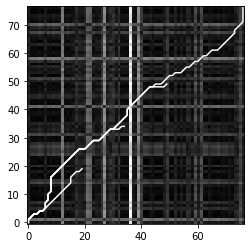

In [409]:
## Compute the dynamic time warped distance between x and y
from dtw import dtw
from numpy.linalg import norm

#### BASS####
dist_mfcc_5, cost_mfcc_5, acc_cost_mfcc_5, path = dtw(MFCC1_bass_tr_1_5 .T, MFCC2_bass_tr_1_5 .T, dist=lambda x, y: norm(x - y, ord=1))
dist_mfcc_20, cost_mfcc_20, acc_cost_mfcc_20, path = dtw(MFCC1_bass_tr_1_20 .T, MFCC2_bass_tr_1_20 .T, dist=lambda x, y: norm(x - y, ord=1))
dist_mfcc_35, cost_mfcc_35, acc_cost_mfcc_35, path = dtw(MFCC1_bass_tr_1_35 .T, MFCC2_bass_tr_1_35 .T, dist=lambda x, y: norm(x - y, ord=1))
dist_mfcc_50, cost_mfcc_50, acc_cost_mfcc_50, path = dtw(MFCC1_bass_tr_1_50 .T, MFCC2_bass_tr_1_50 .T, dist=lambda x, y: norm(x - y, ord=1))
dist_mfcc_77, cost_mfcc_77, acc_cost_mfcc_77, path = dtw(MFCC1_bass_tr_1_77 .T, MFCC2_bass_tr_1_77 .T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', [dist_mfcc_5, dist_mfcc_20, dist_mfcc_35, dist_mfcc_50, dist_mfcc_77])
#print("pair cost.shape:", cost.shape)

#plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
#plt.plot(path[0], path[1], 'w')
#plt.xlim((-0.5, cost.shape[0]-0.5))
#plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(MFCC1_20.T, MFCC2_20.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(MFCC1_35.T, MFCC2_35.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(MFCC1_50.T, MFCC2_50.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))

#############################################################################################
dist, cost, acc_cost, path = dtw(MFCC1_77.T, MFCC2_77.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))

### DTW of Cover 80 - GFCC - distributions

Normalized distance between the two sounds: 6263.847747802734
pair cost.shape: (5, 5)
Normalized distance between the two sounds: 31921.595153808594
pair cost.shape: (20, 20)
Normalized distance between the two sounds: 53775.867736816406
pair cost.shape: (35, 35)
Normalized distance between the two sounds: 82068.78729248047
pair cost.shape: (50, 50)
Normalized distance between the two sounds: 126670.44906616211
pair cost.shape: (77, 77)


(-0.5, 76.5)

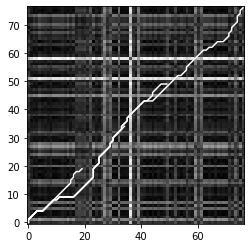

In [410]:
## Compute the dynamic time warped distance between x and y
from dtw import dtw
from numpy.linalg import norm

dist, cost, acc_cost, path = dtw(GFCC1_5.T, GFCC2_5.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(GFCC1_20.T, GFCC2_20.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(GFCC1_35.T, GFCC2_35.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(GFCC1_50.T, GFCC2_50.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))

#############################################################################################
dist, cost, acc_cost, path = dtw(GFCC1_77.T, GFCC2_77.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))

### DTW of Cover 80 - MFCC & GFCC - distributions

## DTW for Plegiarism 45 songs - MFCC

Normalized distance between the two sounds: 0.12682560738176107
pair cost.shape: (5, 5)
Normalized distance between the two sounds: 0.6023316299542785
pair cost.shape: (20, 20)
Normalized distance between the two sounds: 1.2153753880411386
pair cost.shape: (35, 35)
Normalized distance between the two sounds: 1.6228154967539012
pair cost.shape: (45, 45)


(-0.5, 44.5)

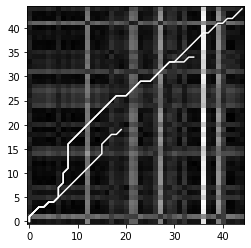

In [427]:
## Compute the dynamic time warped distance between x and y
from dtw import dtw
from numpy.linalg import norm

dist, cost, acc_cost, path = dtw(MFCC1c_5.T, MFCC2c_5.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(MFCC1c_20.T, MFCC2c_20.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(MFCC1c_35.T, MFCC2c_35.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(MFCC1c_45.T, MFCC2c_45.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))



## DTW for Plegiarism 45 songs - GFCC

Normalized distance between the two sounds: 6263.847747802734
pair cost.shape: (5, 5)
Normalized distance between the two sounds: 31921.595153808594
pair cost.shape: (20, 20)
Normalized distance between the two sounds: 53775.867736816406
pair cost.shape: (35, 35)
Normalized distance between the two sounds: 71095.0064086914
pair cost.shape: (45, 45)


(-0.5, 44.5)

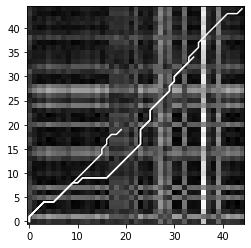

In [428]:
## Compute the dynamic time warped distance between x and y
from dtw import dtw
from numpy.linalg import norm

dist, cost, acc_cost, path = dtw(GFCC1c_5.T, GFCC2c_5.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(GFCC1c_20.T, GFCC2c_20.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(GFCC1c_35.T, GFCC2c_35.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))
#############################################################################################
dist, cost, acc_cost, path = dtw(GFCC1c_45.T, GFCC2c_45.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)
print("pair cost.shape:", cost.shape)

plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))



### DTW of Plegiarism 45 songs - MFCC & GFCC - distributions

In [348]:
mfcc1_c = np.array (testdf['MFCC_1']) ## Copy_45
gfcc1_c = np.array (testdf['GFCC_1']) ## Copy_45
hpcp1_c = np.array (testdf['HPCP_1']) ## Copy_45
mfcc2_c = np.array (testdf['MFCC_2']) ## Copy_45
gfcc2_c = np.array (testdf['GFCC_2']) ## Copy_45
hpcp2_c = np.array (testdf['HPCP_2']) ## Copy_45
sim_mat_c = np.array (testdf['sim_matrix']) ## Copy_45

In [317]:
mfcc_0 = np.mean(mfcc1[0])
gfcc_0 = np.mean(gfcc1[0])
hpcp_0 = np.mean(hpcp1[0])
mfcc_0_0 = np.mean(mfcc2[0])
gfcc_0_0 = np.mean(gfcc2[0])
hpcp_0_0 = np.mean(hpcp2[0])
sim_mat_0 = np.mean(sim_mat[0])

In [318]:
mfcc_1 = np.mean(mfcc1[1])
gfcc_1 = np.mean(gfcc1[1])
hpcp_1 = np.mean(hpcp1[1])
mfcc_1_1 = np.mean(mfcc2[1])
gfcc_1_1 = np.mean(gfcc2[1])
hpcp_1_1 = np.mean(hpcp2[1])
sim_mat_1 = np.mean(sim_mat[1])

In [319]:
mfcc_2 = np.mean(mfcc1[2])
gfcc_2 = np.mean(gfcc1[2])
hpcp_2 = np.mean(hpcp1[2])
mfcc_2_2 = np.mean(mfcc2[2])
gfcc_2_2 = np.mean(gfcc2[2])
hpcp_2_2 = np.mean(hpcp2[2])
sim_mat_2 = np.mean(sim_mat[2])

In [320]:
# Creating the dataframe  
df_0 = pd.DataFrame({"MFCC_1":[mfcc_0], 
                   "GFCC_1":[gfcc_0],  
                   "HPCP_1":[hpcp_0], 
                   "MFCC_2":[mfcc_0_0],
                   "GFCC_2":[gfcc_0_0],
                   "HPCP_2":[hpcp_0_0],
                    "sim_matrix": [sim_mat_0]},)

df_1 = pd.DataFrame({"MFCC_1":[mfcc_1], 
                   "GFCC_1":[gfcc_1],  
                   "HPCP_1":[hpcp_1], 
                   "MFCC_2":[mfcc_1_1],
                   "GFCC_2":[gfcc_1_1],
                   "HPCP_2":[hpcp_1_1],
                    "sim_matrix": [sim_mat_1]},)


df_2 = pd.DataFrame({"MFCC_1":[mfcc_2], 
                   "GFCC_1":[gfcc_2],  
                   "HPCP_1":[hpcp_2], 
                   "MFCC_2":[mfcc_2_2],
                   "GFCC_2":[gfcc_2_2],
                   "HPCP_2":[hpcp_2_2],
                    "sim_matrix": [sim_mat_2]},)

In [341]:
df = pd.concat([df_0, df_1, df_2], ignore_index=True, sort=False)

In [342]:
df

,MFCC_1,GFCC_1,HPCP_1,MFCC_2,GFCC_2,HPCP_2,sim_matrix
0,0.001230,70.617264,0.236928,0.000820,53.866570,0.239422,924.811218
1,0.000465,40.270172,0.314610,0.003155,140.719757,0.321678,759.359375
2,0.000403,21.099199,0.330665,0.000453,43.406658,0.341384,1244.238037


### ANOVA 

## Null - test2t1 is equalt to train2t. i.e. p-value <= 0.05

In [115]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(train2t, test2t1)
print(fvalue, pvalue)
# 23.27787426682977 3.8617587950504134e-06



23.27787426682977 3.8617587950504134e-06


In [17]:
#import csvfrom sklearn.model_selection 
#import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScalerimport,keras

ImportError: cannot import name 'StandardScalerimport' from 'sklearn.preprocessing' (/opt/tljh/user/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [12]:
#data = data.drop(['filename'],axis=1)#Encoding the Labels
#genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(newdf.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NameError: name 'LabelEncoder' is not defined